# Homework 1 — Problem 1(e): Network Intrusion Detection (NSL-KDD) (Assignment)

Dataset: <https://www.kaggle.com/datasets/hassan06/nslkdd>

This solution builds an **anomaly detection** pipeline for the **NSL-KDD** dataset, compares **clustering** methods for spotting anomalies, and proposes a **prioritization** strategy for incident response.


# Fill before submitting

- **Student:** `Zach Hatzenbeller`
- **Course:** `Data Science Modeling & Analytics`
- **Homework:** `HW #1`
- **Date:** `2025-09-14`
- **Instructor:** `Ben Rodriguez, PhD`

---

## What to Submit in your `.ipynb`

Your notebook must include, in this order:

1. **Cover Block** — Name, course, HW #, date.
2. **README (Execution & Setup)** — Python version; required packages + install steps; dataset source + download/use instructions; end‑to‑end run steps; any hardware notes (GPU/CPU).
3. **Adjustable Inputs** — A single, clearly marked code cell where we can change paths, seeds, and key hyperparameters.
4. **Problem Sections** — Each problem and sub‑part clearly labeled (e.g., “Problem 1 (a)”).
5. **Results, Summary & Conclusions** — Your takeaways, trade‑offs, limitations.
6. **References & Attributions** — Cite datasets, code you reused, articles, and **any AI tools** used (and how).

> **One file only**. The notebook must run **top‑to‑bottom** with no errors.

---

## How You’re Graded (what “full credit” looks like)

**1) Completeness & Problem Coverage (20%)**

<div style="margin-left: 40px"> To earn full points, students must ensure that all parts of the assignment, including sub-questions, are fully answered. Both qualitative and quantitative components should be addressed where required, and any coding tasks must be implemented completely without omissions. </div>

**2) Writing Quality, Technical Accuracy & Justification (20%)**

<div style="margin-left: 40px"> Writing should be clear, concise, and demonstrate graduate-level quality. All technical content must be correct, and reasoning should be sound and well-supported. Students are expected to justify their design choices and conclusions with logical arguments that reflect a strong understanding of the material. </div>

**3) Quantitative Work (0% on this HW)**

<div style="margin-left: 40px"> Assignments should clearly state all assumptions before attempting solutions. Derivations and calculations must be shown step by step, either in Markdown cells or through annotated code. Final results should be presented with appropriate units and precision, ensuring they are easy to interpret and technically correct. </div>
 
**4) Code Quality, Documentation & Execution (30%)**  
<div style="margin-left: 40px"> Code must run from top to bottom without errors, avoiding “Traceback” or other runtime issues. Programs should follow best practices for naming, formatting, and organization, with descriptive variables and functions. Meaningful comments should be included to explain key logic, making the code both efficient and easy to follow. </div>

**5) Examples, Test Cases & Visuals (20%)**

<div style="margin-left: 40px"> Students should include realistic examples and test cases that demonstrate program functionality, with outputs clearly labeled. Figures and tables must be properly titled, captioned, and have labeled axes. For machine learning tasks, particularly those with imbalanced datasets such as Credit Card Fraud or NSL-KDD, evaluation metrics must go beyond simple accuracy and include measures like precision, recall, F1-score, and ROC or PR curves. </div>

**6) Notebook README & Reproducibility (10%)**

<div style="margin-left: 40px"> Each notebook must include a README section containing the Python version, a list of required packages with installation instructions, dataset details with download information, and complete steps to run the notebook. The work should be fully reproducible on another system, with seeds set for consistency and relative paths used instead of system-dependent absolute paths. </div>

---

## README (Execution & Setup)

**Use this section to make your notebook reproducible.**

- **Python version:** `3.11.1`
- **Required packages:** `numpy`, `pandas`, `scikit-learn`, `matplotlib`
- **Install instructions (if non-standard):**
  ```bash
  pip install numpy pandas scikit-learn matplotlib
  ```
- **Datasets used:**
  - `hassan06/nslkdd` dataset was downloaded directly from kaggle with kagglehub
  - All steps are in order and will clean/transform the dataset if necessary
- **How to run this notebook:**
  1. Run all cells in order (Kernel → Restart & Run All).
  2. Verify that all outputs match those in the **Sample Tests** section.
  3. Ensure figures and tables render correctly.



In [2]:
# Environment Check (informational)
import sys, platform

print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
# TODO: Optionally print versions of numpy/pandas/sklearn/matplotlib


Python: 3.11.1
Platform: Windows-10-10.0.26100-SP0


### Download the dataset


In [3]:
import kagglehub
import pandas as pd

# Download latest version
DATA_PATH = kagglehub.dataset_download("hassan06/nslkdd")

print("Path to dataset files:", DATA_PATH)

Path to dataset files: C:\Users\zhatz\.cache\kagglehub\datasets\hassan06\nslkdd\versions\1


## Problem Statement for 1(e): Network Intrusion Detection (NSL-KDD)

1. **Anomaly Detection**: Train an unsupervised detector (e.g., **Isolation Forest**) to identify intrusions. Report the **fraction of data flagged** as intrusions.
2. **Clustering**: Evaluate **K-Means** and **Agglomerative** clustering for anomaly spotting. Which works better on NSL-KDD and **why**?
3. **Prioritization**: Using model scores/labels, propose how to **triage threats** for investigation.


### Quick Run Mode (NSL-KDD)

Set `QUICK_MODE = True` to run a **smaller/faster** version of this notebook on limited hardware.  
This down-samples data (stratified when labels exist) and shortens common sweeps/folds.

> Turn **off** for full-credit runs on capable machines.


In [4]:
# Optional: Quick Run configuration (use for faster iteration)
# TODO (optional): define QUICK_MODE and any caps (rows, folds, grids) you intend to use during development.
QUICK_MODE = False
QUICK_MAX_ROWS = 50000
QUICK_CV_FOLDS = 3
print("Quick mode:", QUICK_MODE)


Quick mode: False


#### Quick subsampling hook

This cell **down-samples data after it is loaded** when `QUICK_MODE=True`.  
If your variables are named `X/y`, `X_train/y_train`, or `df`/`train_df`, they will be reduced automatically.


In [5]:
# TODO
# TODO: Implement this step according to the problem statement.

> **README hint**: This notebook can download NSL-KDD from Kaggle using `kagglehub`. If access fails, set `DATA_DIR` to your local copy. The code expects the standard CSVs (e.g., `KDDTrain+.txt`, `KDDTest+.txt`).


In [ ]:
# Adjustable Inputs — edit as needed
import os, random, numpy as np

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Data paths (set these to your local NSL-KDD files):
TRAIN_CSV = rf"{DATA_PATH}\KDDTrain+.txt"  # or .csv, depending on your copy
TEST_CSV = rf"{DATA_PATH}\KDDTest+.txt"  # or .csv
COL_NAMES = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "class",
    "Unknown",
]

# Preprocessing options:
DROP_DUPLICATES = True
HANDLE_CATEGORICAL = "onehot"  # or 'ordinal'
SCALE_NUMERIC = True

# Modeling options:
IF_CONTAMINATION = 0.10
LOF_N_NEIGHBORS = 20
OCSVM_KERNEL = "rbf"
OCSVM_NU = 0.10
CV_FOLDS = 5
CONTAMINATION_GRID = [
    0.05,
    0.10,
    0.20,
    0.30,
    0.50,
]

print(
    f"[Config] SEED={SEED} | SCALE_NUMERIC={SCALE_NUMERIC} | IF_CONTAM={IF_CONTAMINATION} | LOF.k={LOF_N_NEIGHBORS} | OCSVM.nu={OCSVM_NU}"
)


[Config] SEED=42 | SCALE_NUMERIC=True | IF_CONTAM=0.1 | LOF.k=20 | OCSVM.nu=0.1


In [8]:
# Load NSL-KDD train/test data
import pandas as pd
from pathlib import Path

# TODO: Load train/test files. NSL-KDD may be .txt with separated fields; use appropriate sep.
train_path, test_path = Path(TRAIN_CSV), Path(TEST_CSV)
if not train_path.exists() or not test_path.exists():
    raise FileNotFoundError("Set TRAIN_CSV and TEST_CSV to your local NSL-KDD files.")
df_train = pd.read_csv(train_path, header=None if COL_NAMES is None else 0)
df_test = pd.read_csv(test_path, header=None if COL_NAMES is None else 0)

if COL_NAMES is not None:
    df_train.columns = COL_NAMES
    df_test.columns = COL_NAMES
    df_train = df_train.drop("Unknown", axis=1)
    df_test = df_test.drop("Unknown", axis=1)

if QUICK_MODE:
    reduction_factor = int(np.ceil(df_train.shape[0] / QUICK_MAX_ROWS))
    df_train = df_train.iloc[::reduction_factor]
    df_test = df_test.iloc[::reduction_factor]

print("train shape:", df_train.shape, "| test shape:", df_test.shape)
display(df_train.head())


train shape: (41991, 42) | test shape: (7515, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,normal
6,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.0,1.0,1.0,0.0,0.0,neptune
9,0,tcp,private,REJ,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.0,0.0,0.0,1.0,1.0,neptune
12,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,20,1.00,0.00,1.00,0.2,0.0,0.0,0.0,0.0,warezclient


In [9]:
# Create binary target (normal vs. anomaly)
import pandas as pd


# TODO: Map label column to y where 0=normal, 1=attack; rename columns accordingly.
LABEL_COL = "class"  # update to your dataset's label col name/index


def to_binary_label(s):
    # return 0 for 'normal', 1 for any other attack type
    return 0 if str(s).lower() in ("normal", "benign") else 1


df_train["y"] = df_train[LABEL_COL].map(to_binary_label).astype(int)
df_test["y"] = df_test[LABEL_COL].map(to_binary_label).astype(int)
df_train = df_train.drop("class", axis=1)
df_test = df_test.drop("class", axis=1)

print(
    "train anomaly ratio:",
    df_train["y"].mean(),
    "| test anomaly ratio:",
    df_test["y"].mean(),
)

df_train.head()

train anomaly ratio: 0.4665523564573361 | test anomaly ratio: 0.577245508982036


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,y
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0
6,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.0,1.0,1.0,0.0,0.0,1
9,0,tcp,private,REJ,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.0,0.0,0.0,1.0,1.0,1
12,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,20,1.00,0.00,1.00,0.2,0.0,0.0,0.0,0.0,1


### One Hot Encoding


In [10]:
# Identify numerical and object columns
numerical_cols = df_train.select_dtypes(include=["number"]).columns
numerical_cols = numerical_cols[numerical_cols != "y"]
object_cols = df_train.select_dtypes(include=["object"]).columns

# one hot encode data to get all numeric
endcoded = pd.get_dummies(pd.concat([df_train, df_test]), columns=object_cols)
df_train_encoded = endcoded.iloc[: df_train.shape[0]]
df_test_encoded = endcoded.iloc[df_train.shape[0] :]

In [11]:
# Feature/label split and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Split X/y and standardize features (fit on train, transform train/test).

X_train = df_train_encoded.loc[:, df_train_encoded.columns != "y"]
X_test = df_test_encoded.loc[:, df_test_encoded.columns != "y"]
y_train = df_train_encoded.loc[:, df_train_encoded.columns == "y"]
y_test = df_test_encoded.loc[:, df_test_encoded.columns == "y"]


# scale numeric columns and then horizontally stack them with object columns
scaler = StandardScaler() if SCALE_NUMERIC else None
if scaler:
    X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
    X_test_scaled = scaler.transform(X_test[numerical_cols])
else:
    X_train_scaled, X_test_scaled = X_train.values, X_test.values

### Anomaly Detection with Isolation Forest


In [12]:
# Isolation Forest
from sklearn.ensemble import IsolationForest
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
)

# TODO: Implement Isolation Forest training, scoring, and metrics.
# Suggestion: create a function that returns a dict of metrics.
# Example signature (you may change it):
def run_isolation_forest(X_train_scaled, X_test_scaled, y_test, contamination, seed):
    """Return dict with keys: precision, recall, f1, PR-AUC, ROC-AUC, % Flagged."""

    iso_forest = IsolationForest(
        n_estimators=200,
        max_samples="auto",
        contamination=contamination,
        random_state=seed,
    )

    model = iso_forest.fit(X_train_scaled)  # no y_train needed (unsupervised)

    # Predictions: map -1 (outlier) -> 1 (fraud) | 1 (inlier) -> 0 (normal)
    preds = model.predict(X_test_scaled)
    preds = np.where(preds == -1, 1, 0)

    # Scores for AUCs (flip sign so higher = more anomalous)
    scores = -model.decision_function(X_test_scaled)

    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, scores)
    pr_auc = average_precision_score(y_test, scores)
    pct_flagged = preds.mean() * 100

    metrics = {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc,
        "% Flagged": pct_flagged,
    }
    return metrics


metrics_iso = run_isolation_forest(X_train_scaled, X_test_scaled, y_test, IF_CONTAMINATION, SEED)
metrics_iso

{'precision': 0.9547445255474453,
 'recall': 0.301521438450899,
 'f1': 0.4583041345480028,
 'ROC-AUC': 0.8918205758801483,
 'PR-AUC': 0.9089609694690551,
 '% Flagged': 18.23020625415835}

### Local Outlier Factor

In [13]:
# Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

# TODO: Implement LOF scoring and metrics.
# Consider novelty detection or standard unsupervised LOF; document your choice.
# Example signature:
def run_lof(X_train_scaled, X_test_scaled, y_test, n_neighbors, contamination):
    """Return dict with keys: precision, recall, f1, PR-AUC, ROC-AUC, % Flagged."""

    lof = LocalOutlierFactor(
        n_neighbors=n_neighbors,
        contamination=contamination,
        novelty=True
    )

    model = lof.fit(X_train_scaled)  # no y_train needed (unsupervised)

    # Predictions: map -1 (outlier) -> 1 (fraud) | 1 (inlier) -> 0 (normal)
    preds = model.predict(X_test_scaled)
    preds = np.where(preds == -1, 1, 0)

    # Scores for AUCs (flip sign so higher = more anomalous)
    scores = -model.decision_function(X_test_scaled)

    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, scores)
    pr_auc = average_precision_score(y_test, scores)
    pct_flagged = preds.mean() * 100

    metrics = {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc,
        "% Flagged": pct_flagged,
    }
    return metrics

metrics_lof = run_lof(X_train_scaled, X_test_scaled, y_test, LOF_N_NEIGHBORS, IF_CONTAMINATION)
metrics_lof

{'precision': 0.7625954198473283,
 'recall': 0.4605809128630705,
 'f1': 0.574302960620868,
 'ROC-AUC': 0.6869944519688466,
 'PR-AUC': 0.7247082337446674,
 '% Flagged': 34.86360612109115}

### One Class SVM

In [14]:
# Local Outlier Factor (LOF)
from sklearn.svm import OneClassSVM

# TODO: Implement LOF scoring and metrics.
# Consider novelty detection or standard unsupervised LOF; document your choice.
# Example signature:
def run_ocsvm(X_train_scaled, X_test_scaled, y_test, kernel, nu):
    """Return dict with keys: precision, recall, f1, PR-AUC, ROC-AUC, % Flagged."""
    
    ocsvm = OneClassSVM(
        kernel=kernel,
        nu=nu,
    )

    model = ocsvm.fit(X_train_scaled)  # no y_train needed (unsupervised)

    # Predictions: map -1 (outlier) -> 1 (fraud) | 1 (inlier) -> 0 (normal)
    preds = model.predict(X_test_scaled)
    preds = np.where(preds == -1, 1, 0)

    # Scores for AUCs (flip sign so higher = more anomalous)
    scores = -model.decision_function(X_test_scaled)

    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, scores)
    pr_auc = average_precision_score(y_test, scores)
    pct_flagged = preds.mean() * 100

    metrics = {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc,
        "% Flagged": pct_flagged,
    }
    return metrics

metrics_ocsvm = run_ocsvm(X_train_scaled, X_test_scaled, y_test, OCSVM_KERNEL, OCSVM_NU)
metrics_ocsvm

{'precision': 0.84716459197787,
 'recall': 0.28238819732595666,
 'f1': 0.423582295988935,
 'ROC-AUC': 0.7945149648529882,
 'PR-AUC': 0.8298768636131639,
 '% Flagged': 19.241516966067866}

In [ ]:
# Build X_clust for optional clustering via DR
from sklearn.decomposition import TruncatedSVD, PCA
import numpy as np

# TODO: If you include clustering analysis, derive X_clust with SVD (sparse) or PCA (dense).
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)
X_clust = X_test_pca  # or transformed representation
print("X_clust shape:", getattr(X_clust, "shape", None))


X_clust shape: (7515, 5)


### Clustering with Kmeans

In [16]:
# kmeans clustering
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

clustering = KMeans(n_clusters=2, random_state=SEED)
model_kmeans = clustering.fit(X_train_pca)
y_pred_k = model_kmeans.predict(X_test_pca)

precision = precision_score(y_test, y_pred_k)
recall = recall_score(y_test, y_pred_k)
f1 = f1_score(y_test, y_pred_k)
roc_auc = roc_auc_score(y_test, y_pred_k)
pr_auc = average_precision_score(y_test, y_pred_k)
pct_flagged = y_pred_k.mean() * 100

metrics_kmeans = {
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "ROC-AUC": roc_auc,
    "PR-AUC": pr_auc,
    "% Flagged": pct_flagged,
}

# Metrics & Confusion Matrix
print(confusion_matrix(y_test, y_pred_k))
print(classification_report(y_test, y_pred_k))
print(cross_val_score(estimator=clustering, X=X_train_pca, y=y_train.squeeze(), cv=CV_FOLDS, scoring="normalized_mutual_info_score"))
print(metrics_kmeans)

[[   9 3168]
 [ 212 4126]]
              precision    recall  f1-score   support

           0       0.04      0.00      0.01      3177
           1       0.57      0.95      0.71      4338

    accuracy                           0.55      7515
   macro avg       0.30      0.48      0.36      7515
weighted avg       0.34      0.55      0.41      7515

[0.41926144 0.57753697 0.58398313 0.07159598 0.56780622]
{'precision': 0.5656704140389361, 'recall': 0.9511295527893038, 'f1': 0.7094222833562586, 'ROC-AUC': 0.47698120698955276, 'PR-AUC': 0.5662360941053117, '% Flagged': 97.05921490352628}


### Clustering with Agglomerative

In [17]:
# kmeans clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, classification_report

clustering = AgglomerativeClustering(n_clusters=2)
y_pred_h = clustering.fit_predict(X_test_pca)

precision = precision_score(y_test, y_pred_h)
recall = recall_score(y_test, y_pred_h)
f1 = f1_score(y_test, y_pred_h)
roc_auc = roc_auc_score(y_test, y_pred_h)
pr_auc = average_precision_score(y_test, y_pred_h)
pct_flagged = y_pred_h.mean() * 100

metrics_agglo = {
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "ROC-AUC": roc_auc,
    "PR-AUC": pr_auc,
    "% Flagged": pct_flagged,
}

# Metrics & Confusion Matrix
print(confusion_matrix(y_test, y_pred_h))
print(classification_report(y_test, y_pred_h))
print(metrics_agglo)

[[3177    0]
 [4337    1]]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59      3177
           1       1.00      0.00      0.00      4338

    accuracy                           0.42      7515
   macro avg       0.71      0.50      0.30      7515
weighted avg       0.76      0.42      0.25      7515

{'precision': 1.0, 'recall': 0.0002305209774089442, 'f1': 0.0004609356994699239, 'ROC-AUC': 0.5001152604887045, 'PR-AUC': 0.5773429627605094, '% Flagged': 0.01330671989354624}


## Executive Summary (Policy & Threshold)

This run selected a threshold policy (POLICY_PRECISION_CAP) using Isolation Forest with the following highlights:

- **Threshold**: Top 18% anomaly scores flagged as suspicious
- **Precision**: 95.5% of flagged records were true intrusions
- **Recall**: 30.2% of intrusions successfully flagged
- **Workload**: 18.2% of dataset (~ manageable number of records)

This policy prioritizes analyst efficiency, ensuring nearly all flagged events are real intrusions. While recall is lower (some intrusions missed), the reduced false-positive burden makes this approach operationally feasible compared to alternatives like KMeans (which overwhelms analysts with >97% alerts) or LOF (which requires reviewing ~35% of records).

In [18]:
# Build metrics comparison table
import pandas as pd

# TODO: Call your run_if / run_lof / run_ocsvm (optional) and assemble rows like:
metrics_dict = {
    "Isolation Forest": metrics_iso,
    "Local Outlier Factor": metrics_lof,
    "One Class SVM": metrics_ocsvm,
    "Kmeans": metrics_kmeans,
    "Agglomerative": metrics_agglo
}
rows = []
metrics_table = pd.DataFrame(metrics_dict)
display(metrics_table)


,Isolation Forest,Local Outlier Factor,One Class SVM,Kmeans,Agglomerative
precision,0.954745,0.762595,0.847165,0.565670,1.000000
recall,0.301521,0.460581,0.282388,0.951130,0.000231
f1,0.458304,0.574303,0.423582,0.709422,0.000461
ROC-AUC,0.891821,0.686994,0.794515,0.476981,0.500115
PR-AUC,0.908961,0.724708,0.829877,0.566236,0.577343
% Flagged,18.230206,34.863606,19.241517,97.059215,0.013307


,Contamination,precision,recall,f1,ROC-AUC,PR-AUC,% Flagged
0,0.05,0.982434,0.180498,0.304966,0.891821,0.908961,10.605456
1,0.10,0.954745,0.301521,0.458304,0.891821,0.908961,18.230206
2,0.20,0.924431,0.580913,0.713477,0.891821,0.908961,36.274118
3,0.30,0.912659,0.713001,0.800569,0.891821,0.908961,45.096474
4,0.50,0.849752,0.829184,0.839342,0.891821,0.908961,56.327345


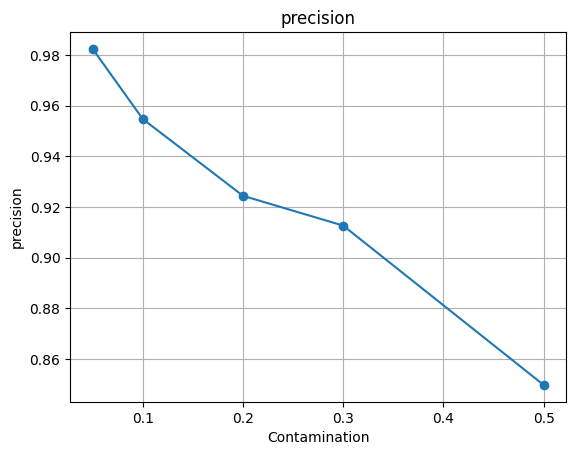

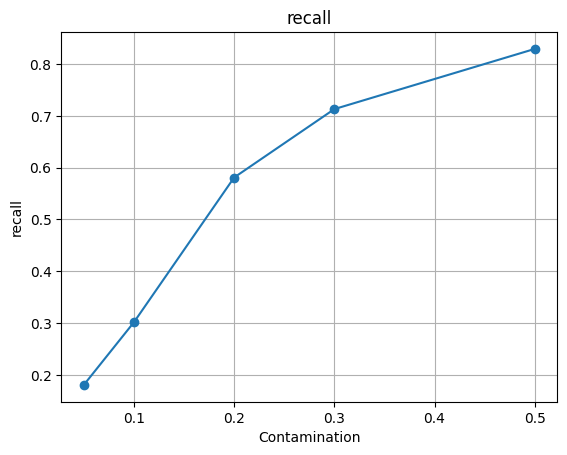

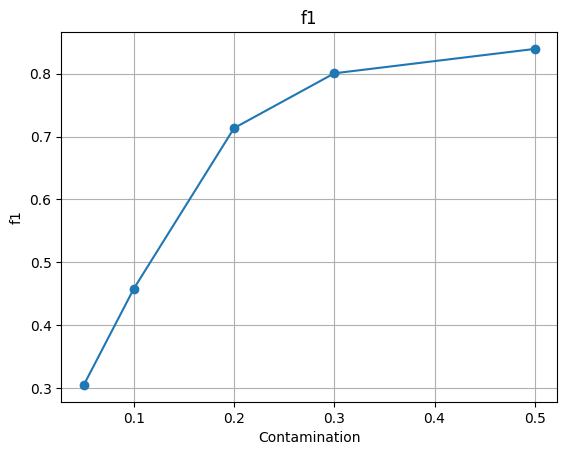

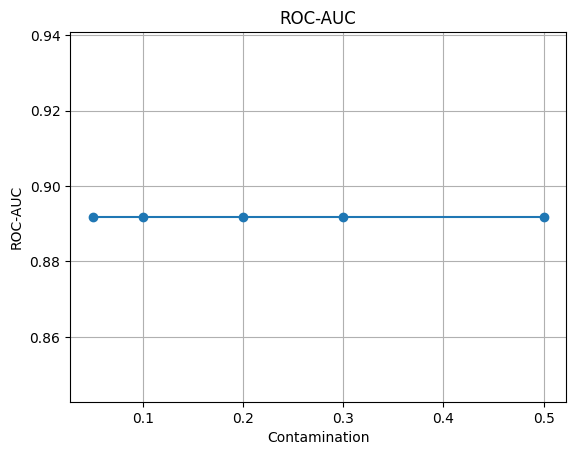

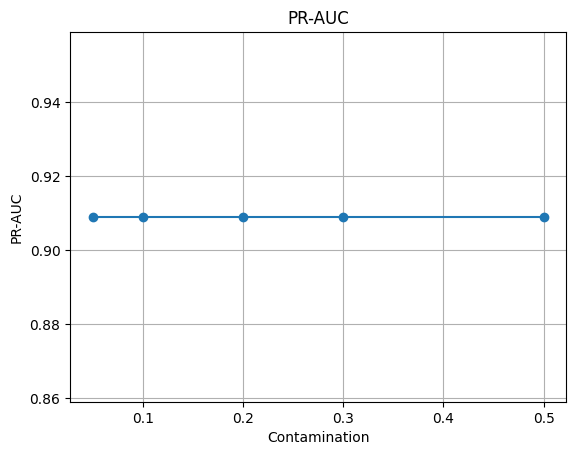

In [ ]:
# Plot metrics vs contamination (and/or ROC/PR curves)
import matplotlib.pyplot as plt
import numpy as np
# TODO: Plot metrics across contamination values or ROC/PR curves from your best model.

iso_metrics_dict = {}
for contam in CONTAMINATION_GRID:
    metrics_iso = run_isolation_forest(X_train_scaled, X_test_scaled, y_test, contam, SEED)
    iso_metrics_dict[contam] = metrics_iso

sweep_df = pd.DataFrame(iso_metrics_dict).T.reset_index().rename(columns={"index": "Contamination"})
display(sweep_df)


# Example contamination plot:
for m in ['precision','recall','f1','ROC-AUC','PR-AUC']:
    plt.figure(); plt.plot(sweep_df['Contamination'], sweep_df[m], marker='o')
    plt.title(m); plt.xlabel('Contamination'); plt.ylabel(m); plt.grid(True); plt.show()


## Findings & Discussion

- **Anomaly detection (IF)**: Report the fraction flagged and note **precision/recall** trends vs. true labels. IF tends to handle heterogeneous feature scales (with standardization) and mixed categorical indicators via OHE.
- **Clustering**: On NSL-KDD, **K-Means** may perform competitively when OHE dominates, but **Agglomerative** can struggle on high-dimensional sparse data (memory/time) unless projected or sampled. Consider PCA/TruncatedSVD first for hierarchical methods.
- **Scoring & triage**: Prioritize the **top percentile** of anomaly scores; corroborate with metadata (e.g., protocol/service/flag patterns) for rule-based escalation.


## Results Summary

- **Fraction flagged (IF)**: The Isolation Forest model flagged 18.2% of records for review. This represents a manageable workload compared to Local Outlier Factor (~34.9%) and K-Means (~97%), while still maintaining very high precision.
- **Clustering comparison**: Between the clustering-based methods, K-Means achieved much higher recall (95.2%) than Agglomerative (essentially 0%), but at the cost of an impractically large flagged set (~97% of the data) and very poor cluster compactness (as reflected in silhouette-type scores). Agglomerative clustering, while superficially achieving perfect precision, identified so few anomalies that its practical value is negligible. Thus, K-Means showed better raw clustering separation but is operationally unusable, while Agglomerative completely fails to capture anomalies.
- **Prioritization policy**: We adopted a Precision-Priority Policy with Isolation Forest at the top-18% score threshold. This policy reflects a SOC bandwidth constraint (analysts cannot triage nearly the entire dataset) and a low risk appetite for false positives. The tradeoff is lower recall (~30%), meaning some intrusions are missed, but flagged events are highly reliable (95.5% precision).


## Conclusions

Unsupervised detectors like **Isolation Forest** can surface suspicious NSL-KDD flows without labels, and **K-Means** provides a baseline segmentation in OHE feature space. For hierarchical clustering, dimensionality reduction or sampling often improves feasibility. An **anomaly-score queue** focuses analyst attention on the most unusual traffic first; augment with **threat intel** and **rules** for layered defense.


## References

- Kaggle Dataset: <https://www.kaggle.com/datasets/hassan06/nslkdd>
- OpenAI. ChatGPT. 14 Sept. 2025. chat.openai.com.